## Выполнение ячеек идет в разнобой, т.к. из за большого размера датасета некоторые функции и методы приводили к вылету движка Питона. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns

In [4]:
df_lectures = pd.read_csv("PythonDZ3/lectures.csv")
df_questions = pd.read_csv("PythonDZ3/questions.csv")

### Первый взгляд на lectures и questions

In [5]:
df_lectures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   lecture_id  418 non-null    int64 
 1   tag         418 non-null    int64 
 2   part        418 non-null    int64 
 3   type_of     418 non-null    object
dtypes: int64(3), object(1)
memory usage: 13.2+ KB


In [6]:
df_lectures

,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept
2,185,45,6,concept
3,192,79,5,solving question
4,317,156,5,solving question
...,...,...,...,...
413,32535,8,5,solving question
414,32570,113,3,solving question
415,32604,24,6,concept
416,32625,142,2,concept


In [7]:
df_questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13523 entries, 0 to 13522
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   question_id     13523 non-null  int64 
 1   bundle_id       13523 non-null  int64 
 2   correct_answer  13523 non-null  int64 
 3   part            13523 non-null  int64 
 4   tags            13522 non-null  object
dtypes: int64(4), object(1)
memory usage: 528.4+ KB


In [8]:
df_questions

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38
...,...,...,...,...,...
13518,13518,13518,3,5,14
13519,13519,13519,3,5,8
13520,13520,13520,2,5,73
13521,13521,13521,0,5,125


questions
* question_id: внешний ключ для обучающего/тестового столбца content_id, когда тип контента — вопрос (0).

* bundle_id: код, по которому вопросы подаются вместе.

* correct_answer: ответ на вопрос. 

* part: соответствующий раздел теста.

* tags: один или несколько подробных теговых кодов для вопроса.

lectures
* lecture_id: внешний ключ для обучающего/тестового столбца content_id, когда тип контента — лекция (1).

* part: код категории верхнего уровня для лекции.

* tag: один тег кодов для лекции. 

* type_of: краткое описание основной цели лекции/

### Полностью датасет не открывается, поэтому смотрим как изменяются данные в столбцах, чтобы помимо описанных в kaggle типов данных найти столбцы, у которых можно поменять тип данных на еще менее ресурсоемкий.

In [9]:
df_train_1kk = pd.read_csv("PythonDZ3/train.csv", nrows = 1000000)
df_train_10k = pd.read_csv("PythonDZ3/train.csv", nrows = 10000)

In [10]:
df_train_10k.sample(10)

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
2598,2598,4395284528,24418,5873,0,670,0,1,7000.0,True
6179,6179,8640562009,24418,2602,0,3295,3,1,28666.0,True
4430,4430,6221043498,24418,5000,0,2049,2,0,17000.0,True
1945,1945,1283666045,24418,5255,0,57,0,1,27000.0,True
5970,5970,8620377185,24418,4994,0,3165,1,1,28000.0,True
6710,6710,9760265587,24418,1113,0,3692,0,0,15000.0,True
1591,1591,16654818661,13134,4500,0,801,2,0,25000.0,True
8097,8097,13215626792,24418,3135,0,4683,3,1,23333.0,True
9414,9414,424421396,91216,6845,0,233,3,1,29000.0,True
6638,6638,9588182611,24418,4430,0,3619,3,1,6000.0,True


In [11]:
df_train_1kk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   row_id                          1000000 non-null  int64  
 1   timestamp                       1000000 non-null  int64  
 2   user_id                         1000000 non-null  int64  
 3   content_id                      1000000 non-null  int64  
 4   content_type_id                 1000000 non-null  int64  
 5   task_container_id               1000000 non-null  int64  
 6   user_answer                     1000000 non-null  int64  
 7   answered_correctly              1000000 non-null  int64  
 8   prior_question_elapsed_time     976277 non-null   float64
 9   prior_question_had_explanation  996184 non-null   object 
dtypes: float64(1), int64(8), object(1)
memory usage: 76.3+ MB


In [12]:
df_train_1kk.dtypes

row_id                              int64
timestamp                           int64
user_id                             int64
content_id                          int64
content_type_id                     int64
task_container_id                   int64
user_answer                         int64
answered_correctly                  int64
prior_question_elapsed_time       float64
prior_question_had_explanation     object
dtype: object

In [13]:
df_train_1kk.describe()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time
count,1000000.000000,1.000000e+06,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,976277.000000
mean,499999.500000,7.344311e+09,1.017255e+07,5232.691523,0.019907,806.105689,1.374784,0.617504,25302.962693
std,288675.278932,1.058693e+10,6.029234e+06,3882.323419,0.139681,1025.887530,1.194168,0.525364,19710.310227
min,0.000000,0.000000e+00,1.150000e+02,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000
25%,249999.750000,5.211669e+08,4.702585e+06,2057.000000,0.000000,109.000000,0.000000,0.000000,16000.000000
50%,499999.500000,2.824811e+09,9.678259e+06,5052.000000,0.000000,391.000000,1.000000,1.000000,21000.000000
75%,749999.250000,1.010186e+10,1.556872e+07,7421.000000,0.000000,1112.000000,3.000000,1.000000,29666.000000
max,999999.000000,7.809200e+10,2.094902e+07,32736.000000,1.000000,7739.000000,3.000000,1.000000,300000.000000


In [14]:
df_train_10k.describe()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,9742.000000
mean,4999.50000,7.196144e+09,29872.238400,5308.085000,0.02370,1733.035100,1.373800,0.634100,22084.496407
std,2886.89568,4.906421e+09,21631.152015,4256.595895,0.15212,1540.809639,1.200257,0.528626,12297.803531
min,0.00000,0.000000e+00,115.000000,0.000000,0.00000,0.000000,-1.000000,-1.000000,1000.000000
25%,2499.75000,3.967314e+09,24418.000000,1726.000000,0.00000,307.000000,0.000000,0.000000,16000.000000
50%,4999.50000,6.521474e+09,24418.000000,4794.500000,0.00000,1241.000000,1.000000,1.000000,20000.000000
75%,7499.25000,1.053935e+10,24418.000000,7889.250000,0.00000,3062.250000,3.000000,1.000000,26000.000000
max,9999.00000,2.205064e+10,91216.000000,32736.000000,1.00000,4889.000000,3.000000,1.000000,300000.000000


### prior_question_elapsed_time изменяется [1000; 300000], поэтому можно поменять тип данных на класс UInt32

In [15]:
df_train_10k = df_train_10k.astype({"prior_question_elapsed_time": "UInt32"})

In [16]:
df_train_10k.describe()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,9742.0
mean,4999.50000,7.196144e+09,29872.238400,5308.085000,0.02370,1733.035100,1.373800,0.634100,22084.496407
std,2886.89568,4.906421e+09,21631.152015,4256.595895,0.15212,1540.809639,1.200257,0.528626,12297.803531
min,0.00000,0.000000e+00,115.000000,0.000000,0.00000,0.000000,-1.000000,-1.000000,1000.0
25%,2499.75000,3.967314e+09,24418.000000,1726.000000,0.00000,307.000000,0.000000,0.000000,16000.0
50%,4999.50000,6.521474e+09,24418.000000,4794.500000,0.00000,1241.000000,1.000000,1.000000,20000.0
75%,7499.25000,1.053935e+10,24418.000000,7889.250000,0.00000,3062.250000,3.000000,1.000000,26000.0
max,9999.00000,2.205064e+10,91216.000000,32736.000000,1.00000,4889.000000,3.000000,1.000000,300000.0


In [17]:
df_train_10k.dtypes

row_id                             int64
timestamp                          int64
user_id                            int64
content_id                         int64
content_type_id                    int64
task_container_id                  int64
user_answer                        int64
answered_correctly                 int64
prior_question_elapsed_time       UInt32
prior_question_had_explanation    object
dtype: object

In [18]:
df_train_10k

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,<NA>,NaN
1,1,56943,115,5716,0,2,2,1,37000,False
2,2,118363,115,128,0,0,0,1,55000,False
3,3,131167,115,7860,0,3,0,1,19000,False
4,4,137965,115,7922,0,4,1,1,11000,False
...,...,...,...,...,...,...,...,...,...,...
9995,9995,2868187305,91216,1124,0,775,0,0,18000,True
9996,9996,2868272689,91216,810,0,776,0,1,18000,True
9997,9997,2868367298,91216,1245,0,777,0,1,17000,True
9998,9998,2868439137,91216,711,0,778,3,1,17000,True


train
* row_id: (int64) Идентификационный код строки.

* timestamp: (int64) время в миллисекундах между данным взаимодействием пользователя и первым завершением события от этого пользователя.

* user_id: (int32) Идентификационный код пользователя.

* content_id: (int16) Идентификационный код для взаимодействия с пользователем

* content_type_id: (int8) 0, если событием был вопрос, заданный пользователю, 1, если событием был просмотр пользователем лекции.

* task_container_id: (int16) Код идентификатора для пакета вопросов или лекций. Например, пользователь может увидеть три вопроса подряд, прежде чем увидеть объяснения для любого из них. Все эти три будут иметь общий task_container_id.

* user_answer: (int8) ответ пользователя на вопрос, если таковой имеется. Читать -1 как ноль, для лекций.

* answered_correctly: (int8) если пользователь ответил правильно. Читать -1 как ноль, для лекций.

* prior_question_elapsed_time: (float32) Среднее время в миллисекундах, которое потребовалось пользователю для ответа на каждый вопрос в предыдущем пакете вопросов, игнорируя любые лекции между ними. Имеет значение null для первого пакета вопросов или лекции пользователя.
* 
* prior_question_had_explanation: (bool) Увидел ли пользователь объяснение и правильный ответ(ы) после ответа на предыдущий пакет вопросов, игнорируя любые лекции между ними. Значение является общим для одного пакета вопросов и равно нулю для первого пакета вопросов или лекции пользователя. 

### Считываем файл. Меняем типы данных исходя из информации на kaggle. prior_question_elapsed_time UInt32 для экономии памяти.

In [19]:
df_train = pd.read_csv("PythonDZ3/train.csv", index_col='row_id', dtype ={
    'timestamp':'int64', 'user_id':'int32','content_id':'int16','content_type_id':'bool',
    'task_container_id':'int16','user_answer':'int8', 'answered_correctly':'int8',
    'prior_question_elapsed_time':'UInt32', 'prior_question_had_explanation':'category'})

In [20]:
df_train

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
row_id,,,,,,,,,
0,0,115,5692,False,1,3,1,<NA>,NaN
1,56943,115,5716,False,2,2,1,37000,False
2,118363,115,128,False,0,0,1,55000,False
3,131167,115,7860,False,3,0,1,19000,False
4,137965,115,7922,False,4,1,1,11000,False
...,...,...,...,...,...,...,...,...,...
101230327,428564420,2147482888,3586,False,22,0,1,18000,True
101230328,428585000,2147482888,6341,False,23,3,1,14000,True
101230329,428613475,2147482888,4212,False,24,3,1,14000,True


In [21]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101230332 entries, 0 to 101230331
Data columns (total 9 columns):
 #   Column                          Dtype   
---  ------                          -----   
 0   timestamp                       int64   
 1   user_id                         int32   
 2   content_id                      int16   
 3   content_type_id                 bool    
 4   task_container_id               int16   
 5   user_answer                     int8    
 6   answered_correctly              int8    
 7   prior_question_elapsed_time     UInt32  
 8   prior_question_had_explanation  category
dtypes: UInt32(1), bool(1), category(1), int16(2), int32(1), int64(1), int8(2)
memory usage: 3.1 GB


In [22]:
df_train.isnull().sum()

timestamp                               0
user_id                                 0
content_id                              0
content_type_id                         0
task_container_id                       0
user_answer                             0
answered_correctly                      0
prior_question_elapsed_time       2351538
prior_question_had_explanation     392506
dtype: int64

### Исходя из описания датасета на kaggle, NaN в двух столбцах относятся к типу контента "лекциям", поэтому я решил делать что то с пропущенными значениями после объединения таблиц.

In [23]:
df_train.describe()

,timestamp,user_id,content_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time
count,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,98878794.0
mean,7.703644e+09,1.076732e+09,5.219605e+03,9.040624e+02,1.376123e+00,6.251644e-01,25423.810043
std,1.159266e+10,6.197163e+08,3.866359e+03,1.358302e+03,1.192896e+00,5.225307e-01,19948.146709
min,0.000000e+00,1.150000e+02,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,0.0
25%,5.243436e+08,5.408116e+08,2.063000e+03,1.040000e+02,0.000000e+00,0.000000e+00,16000.0
50%,2.674234e+09,1.071781e+09,5.026000e+03,3.820000e+02,1.000000e+00,1.000000e+00,21000.0
75%,9.924551e+09,1.615742e+09,7.425000e+03,1.094000e+03,3.000000e+00,1.000000e+00,29666.0
max,8.742577e+10,2.147483e+09,3.273600e+04,9.999000e+03,3.000000e+00,1.000000e+00,300000.0


### Соединяем датасет с лекциями и главный датасет, а также датасет с вопросами и главный датасет. 

In [24]:
df_lectures_train = pd.merge(left=df_train, right=df_lectures, 
    left_on="content_id", right_on="lecture_id")

In [25]:
df_lectures_train

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,lecture_id,tag,part,type_of
0,437272,115,7926,False,18,1,1,18000,False,7926,57,5,concept
1,4578814516,24418,7926,True,780,-1,-1,<NA>,False,7926,57,5,concept
2,10790944439,24418,7926,False,3998,1,1,28000,True,7926,57,5,concept
3,1551484585,91216,7926,True,445,-1,-1,<NA>,False,7926,57,5,concept
4,2070150,176303,7926,False,57,0,0,20000,True,7926,57,5,concept
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3262746,14026750449,1456724937,23239,True,5439,-1,-1,<NA>,False,23239,18,7,concept
3262747,1760693247,2082225870,23239,True,240,-1,-1,<NA>,False,23239,18,7,concept
3262748,6215530535,1536722837,18903,True,4167,-1,-1,<NA>,False,18903,28,6,concept
3262749,34201989989,1828007622,18903,True,7574,-1,-1,<NA>,False,18903,28,6,concept


In [26]:
df_train.dtypes

timestamp                            int64
user_id                              int32
content_id                           int16
content_type_id                       bool
task_container_id                    int16
user_answer                           int8
answered_correctly                    int8
prior_question_elapsed_time         UInt32
prior_question_had_explanation    category
dtype: object

In [27]:
df_questions_train = pd.merge(left=df_train, right=df_questions, 
    left_on="content_id", right_on="question_id")

In [28]:
df_questions_train.drop(["question_id"], axis=1, inplace=True)
df_lectures_train.drop(["lecture_id"], axis=1, inplace=True)

In [29]:
df_questions_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100038525 entries, 0 to 100038524
Data columns (total 13 columns):
 #   Column                          Dtype   
---  ------                          -----   
 0   timestamp                       int64   
 1   user_id                         int32   
 2   content_id                      int16   
 3   content_type_id                 bool    
 4   task_container_id               int16   
 5   user_answer                     int8    
 6   answered_correctly              int8    
 7   prior_question_elapsed_time     UInt32  
 8   prior_question_had_explanation  category
 9   bundle_id                       int64   
 10  correct_answer                  int64   
 11  part                            int64   
 12  tags                            object  
dtypes: UInt32(1), bool(1), category(1), int16(2), int32(1), int64(4), int8(2), object(1)
memory usage: 5.3+ GB


### Меняем типы данных для дальнейшего пересечения полученных датасетов.

In [30]:
df_questions_train = df_questions_train.astype({"correct_answer": "int16", 
                                                "part": "int16", 
                                                "tags": "category"})

In [31]:
df_lectures_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3262751 entries, 0 to 3262750
Data columns (total 12 columns):
 #   Column                          Dtype   
---  ------                          -----   
 0   timestamp                       int64   
 1   user_id                         int32   
 2   content_id                      int16   
 3   content_type_id                 bool    
 4   task_container_id               int16   
 5   user_answer                     int8    
 6   answered_correctly              int8    
 7   prior_question_elapsed_time     UInt32  
 8   prior_question_had_explanation  category
 9   tag                             int64   
 10  part                            int64   
 11  type_of                         object  
dtypes: UInt32(1), bool(1), category(1), int16(2), int32(1), int64(3), int8(2), object(1)
memory usage: 152.5+ MB


In [32]:
df_lectures_train[['tag', 'part']].describe()

,tag,part
count,3.262751e+06,3.262751e+06
mean,8.988080e+01,4.204516e+00
std,5.421660e+01,1.838849e+00
min,0.000000e+00,1.000000e+00
25%,4.400000e+01,2.000000e+00
50%,8.500000e+01,5.000000e+00
75%,1.360000e+02,5.000000e+00
max,1.870000e+02,7.000000e+00


In [33]:
df_lectures_train = df_lectures_train.astype({"tag": "int16", 
                                                "part": "int16", 
                                                "type_of": "category"})

In [34]:
df_full = pd.concat([df_lectures_train, df_questions_train])

In [35]:
df_full

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,tag,part,type_of,bundle_id,correct_answer,tags
0,437272,115,7926,False,18,1,1,18000,False,57.0,5,concept,NaN,NaN,NaN
1,4578814516,24418,7926,True,780,-1,-1,<NA>,False,57.0,5,concept,NaN,NaN,NaN
2,10790944439,24418,7926,False,3998,1,1,28000,True,57.0,5,concept,NaN,NaN,NaN
3,1551484585,91216,7926,True,445,-1,-1,<NA>,False,57.0,5,concept,NaN,NaN,NaN
4,2070150,176303,7926,False,57,0,0,20000,True,57.0,5,concept,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100038520,7327293505,1896513376,5823,False,4239,0,1,21000,True,NaN,5,NaN,5823.0,0.0,8
100038521,4339553896,2070144393,10008,False,1406,3,1,23750,False,NaN,6,NaN,10005.0,3.0,55
100038522,4339553896,2070144393,10007,False,1406,1,0,23750,False,NaN,6,NaN,10005.0,0.0,27
100038523,4339553896,2070144393,10006,False,1406,0,1,23750,False,NaN,6,NaN,10005.0,0.0,73


In [36]:
df_full.drop(['correct_answer'], axis = 1)

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,tag,part,type_of,bundle_id,tags
0,437272,115,7926,False,18,1,1,18000,False,57.0,5,concept,NaN,NaN
1,4578814516,24418,7926,True,780,-1,-1,<NA>,False,57.0,5,concept,NaN,NaN
2,10790944439,24418,7926,False,3998,1,1,28000,True,57.0,5,concept,NaN,NaN
3,1551484585,91216,7926,True,445,-1,-1,<NA>,False,57.0,5,concept,NaN,NaN
4,2070150,176303,7926,False,57,0,0,20000,True,57.0,5,concept,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100038520,7327293505,1896513376,5823,False,4239,0,1,21000,True,NaN,5,NaN,5823.0,8
100038521,4339553896,2070144393,10008,False,1406,3,1,23750,False,NaN,6,NaN,10005.0,55
100038522,4339553896,2070144393,10007,False,1406,1,0,23750,False,NaN,6,NaN,10005.0,27
100038523,4339553896,2070144393,10006,False,1406,0,1,23750,False,NaN,6,NaN,10005.0,73


## Сохраняем полученный датасет и очищаем буфер.
## Очищаем данные

In [37]:
df_full.to_csv("PythonDZ3/df_full.csv", index=False)

In [2]:
df_full = pd.read_csv("PythonDZ3/df_full.csv", dtype ={
    'timestamp':'int64', 'user_id':'int32','content_id':'int16','content_type_id':'bool',
    'task_container_id':'int16','user_answer':'int8', 'answered_correctly':'int8',
    'prior_question_elapsed_time':'UInt32', 'prior_question_had_explanation':'category',
    'part': 'int16', 'tags': 'object', 'tag': 'object', 'part': 'int8', 'type_of': 'category'})

In [3]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103301276 entries, 0 to 103301275
Data columns (total 15 columns):
 #   Column                          Dtype   
---  ------                          -----   
 0   timestamp                       int64   
 1   user_id                         int32   
 2   content_id                      int16   
 3   content_type_id                 bool    
 4   task_container_id               int16   
 5   user_answer                     int8    
 6   answered_correctly              int8    
 7   prior_question_elapsed_time     UInt32  
 8   prior_question_had_explanation  category
 9   tag                             object  
 10  part                            int8    
 11  type_of                         category
 12  bundle_id                       float64 
 13  correct_answer                  float64 
 14  tags                            object  
dtypes: UInt32(1), bool(1), category(2), float64(2), int16(2), int32(1), int64(1), int8(3), object(2)

In [4]:
df_full.isnull().sum()

timestamp                                 0
user_id                                   0
content_id                                0
content_type_id                           0
task_container_id                         0
user_answer                               0
answered_correctly                        0
prior_question_elapsed_time         3121379
prior_question_had_explanation       395122
tag                               100038525
part                                      0
type_of                           100038525
bundle_id                           3262751
correct_answer                      3262751
tags                                3262752
dtype: int64

### По результату верхней ячейки заметно, что некоторые столбцы имеют null при типе контента "лекции", а другие при типе контента "вопросы". 
### Таким образом можно проверить так ли это через "пересечение" столбцов и в случае чего объединить эти столбцы.

In [5]:
df_full[(~df_full['tags'].isna()) & (~df_full['tag'].isna())]

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,tag,part,type_of,bundle_id,correct_answer,tags


In [6]:
df_full[(df_full['tags'].isna()) & (df_full['tag'].isna())]

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,tag,part,type_of,bundle_id,correct_answer,tags
103301270,1286282597,1333688829,10033,False,1127,2,1,35000,True,NaN,6,NaN,10033.0,2.0,NaN


In [7]:
df_full.loc[df_full['tags'].isna(), 'tags'] = df_full.loc[df_full['tags'].isna(), 'tag']

In [8]:
df_full.drop(['tag', 'correct_answer'], axis = 1, inplace = True)

Дропнули correct_answer т.к. есть столбцы user_answer и answered_correctly.

In [9]:
df_full[(~df_full['type_of'].isna()) & (~df_full['bundle_id'].isna())]

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,part,type_of,bundle_id,tags


In [10]:
df_full[(df_full['type_of'].isna()) & (df_full['bundle_id'].isna())]

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,part,type_of,bundle_id,tags


In [11]:
df_full['type_of'].value_counts()

type_of
concept             2195409
solving question     917263
intention            145066
starter                5013
Name: count, dtype: int64

In [12]:
df_full['bundle_id'].describe()

count    1.000385e+08
mean     5.006305e+03
std      3.296905e+03
min      0.000000e+00
25%      2.027000e+03
50%      4.987000e+03
75%      7.224000e+03
max      1.352200e+04
Name: bundle_id, dtype: float64

В столбце type_of всего 4 категории, поэтому можно перевести их в float и добавить к bundle.

In [13]:
df_full['type_of'].replace(['concept', 'solving question', 'intention', 'starter'], 
                      [-1, -2, -3, -4], inplace=True)

In [14]:
df_full = df_full.astype({"type_of": "float64"})


In [15]:
df_full.loc[df_full['type_of'].isna(), 'bundle'] = df_full.loc[df_full['type_of'].isna(), 'bundle_id']

In [16]:
df_full.loc[df_full['bundle'].isna(), 'bundle'] = df_full.loc[df_full['bundle'].isna(), 'type_of']

In [17]:
df_full.drop(['type_of', 'bundle_id'], axis = 1, inplace = True)

In [18]:
df_full.isnull().sum()

timestamp                               0
user_id                                 0
content_id                              0
content_type_id                         0
task_container_id                       0
user_answer                             0
answered_correctly                      0
prior_question_elapsed_time       3121379
prior_question_had_explanation     395122
part                                    0
tags                                    1
bundle                                  0
dtype: int64

### В столбцах prior_question_elapsed_time и prior_question_had_explanation нет такого взаимозамещения, поэтому я пытался увидеть в таблице иные зависимости, чтобы при возможности как то иначе поступить со столбцом, кроме как дропнуть или заменить null на какое либо значение.

In [19]:
df_full[(df_full['prior_question_elapsed_time'].isna()) & (df_full['prior_question_had_explanation'].isna())]

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,part,tags,bundle
3636,0,230545468,7926,False,0,1,1,<NA>,NaN,5,57.0,-1.0
43414,0,408877378,185,False,0,0,1,<NA>,NaN,6,45.0,-1.0
56669,165864,999758154,185,False,2,3,0,<NA>,NaN,6,45.0,-1.0
61764,0,1233875513,185,False,0,0,1,<NA>,NaN,6,45.0,-1.0
132519,0,64217312,484,False,0,0,1,<NA>,NaN,5,179.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
103186632,0,2047895484,5684,False,0,2,1,<NA>,NaN,5,8,5684.0
103186660,0,2096065732,5684,False,0,2,1,<NA>,NaN,5,8,5684.0
103186678,0,2139083070,5684,False,0,1,0,<NA>,NaN,5,8,5684.0
103271989,0,581883207,4160,False,1,3,1,<NA>,NaN,5,79,4160.0


In [20]:
df_full[(df_full['content_type_id'] == True) & (df_full['prior_question_had_explanation'].isna())]

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,part,tags,bundle


In [21]:
df_full[(df_full['content_type_id'] == False) & (~df_full['prior_question_had_explanation'].isna())]

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,part,tags,bundle
0,437272,115,7926,False,18,1,1,18000,False,5,57.0,-1.0
2,10790944439,24418,7926,False,3998,1,1,28000,True,5,57.0,-1.0
4,2070150,176303,7926,False,57,0,0,20000,True,5,57.0,-1.0
5,432585,298022,7926,False,16,1,1,23000,False,5,57.0,-1.0
7,50487896,583550,7926,False,76,1,1,24000,True,5,57.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
103301271,7327293505,1896513376,5823,False,4239,0,1,21000,True,5,8,5823.0
103301272,4339553896,2070144393,10008,False,1406,3,1,23750,False,6,55,10005.0
103301273,4339553896,2070144393,10007,False,1406,1,0,23750,False,6,27,10005.0
103301274,4339553896,2070144393,10006,False,1406,0,1,23750,False,6,73,10005.0


### Зависимостей на первый взгляд я не нашел, поэтому решил заменить null на -1, как это было уже в других столбцах.

In [22]:
df_full.dropna(axis = 0, subset=['tags'], inplace=True)

Дропнули строку с null одновременно и в tags, и в tag.

In [23]:
df_full['prior_question_had_explanation']

0            False
1            False
2             True
3            False
4             True
             ...  
103301271     True
103301272    False
103301273    False
103301274    False
103301275    False
Name: prior_question_had_explanation, Length: 103301275, dtype: category
Categories (2, object): ['False', 'True']

In [24]:
df_full['prior_question_had_explanation'].replace(['True', 'False'], [1, 0], inplace=True)
df_full = df_full.astype({"prior_question_had_explanation": "Int32", 'prior_question_elapsed_time': "Int32"})

In [25]:
df_full.fillna(-1, inplace=True)

## Сохраняем датасет и очищаем буфер.
## Визуализация и анализ данных.

In [26]:
df_full.to_csv("PythonDZ3/df_full_clean.csv", index=False)

In [2]:
df_full = pd.read_csv("PythonDZ3/df_full_clean.csv", dtype ={
    'timestamp':'int64', 'user_id':'int32','content_id':'int16','content_type_id':'bool',
    'task_container_id':'int16','user_answer':'int8', 'answered_correctly':'int8',
    'prior_question_elapsed_time':'int32', 'prior_question_had_explanation':'int8',
    'part': 'int16', 'tags': 'category', 'part': 'int8', 'bundle': 'int32'})

In [4]:
df_full

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,part,tags,bundle
0,437272,115,7926,False,18,1,1,18000,0,5,57.0,-1
1,4578814516,24418,7926,True,780,-1,-1,-1,0,5,57.0,-1
2,10790944439,24418,7926,False,3998,1,1,28000,1,5,57.0,-1
3,1551484585,91216,7926,True,445,-1,-1,-1,0,5,57.0,-1
4,2070150,176303,7926,False,57,0,0,20000,1,5,57.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
103301270,7327293505,1896513376,5823,False,4239,0,1,21000,1,5,8,5823
103301271,4339553896,2070144393,10008,False,1406,3,1,23750,0,6,55,10005
103301272,4339553896,2070144393,10007,False,1406,1,0,23750,0,6,27,10005
103301273,4339553896,2070144393,10006,False,1406,0,1,23750,0,6,73,10005


In [5]:
df_full.describe()

,timestamp,user_id,content_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,part,bundle
count,1.033013e+08,1.033013e+08,1.033013e+08,1.033013e+08,1.033013e+08,1.033013e+08,1.033013e+08,1.033013e+08,1.033013e+08,1.033013e+08
mean,7.698400e+09,1.076716e+09,5.234943e+03,9.015300e+02,1.356967e+00,6.136654e-01,2.465190e+04,8.761747e-01,4.086905e+00,4.848138e+03
std,1.158878e+10,6.197306e+08,3.865440e+03,1.355243e+03,1.205267e+00,5.383891e-01,2.011645e+04,3.407969e-01,1.677657e+00,3.360550e+03
min,0.000000e+00,1.150000e+02,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,1.000000e+00,-4.000000e+00
25%,5.249803e+08,5.408046e+08,2.064000e+03,1.050000e+02,0.000000e+00,0.000000e+00,1.500000e+04,1.000000e+00,2.000000e+00,1.673000e+03
50%,2.672078e+09,1.071776e+09,5.038000e+03,3.810000e+02,1.000000e+00,1.000000e+00,2.066600e+04,1.000000e+00,5.000000e+00,4.755000e+03
75%,9.911221e+09,1.615742e+09,7.492000e+03,1.090000e+03,3.000000e+00,1.000000e+00,2.900000e+04,1.000000e+00,5.000000e+00,7.153000e+03
max,8.742577e+10,2.147483e+09,3.273600e+04,9.999000e+03,3.000000e+00,1.000000e+00,3.000000e+05,1.000000e+00,7.000000e+00,1.352200e+04


In [6]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103301275 entries, 0 to 103301274
Data columns (total 12 columns):
 #   Column                          Dtype   
---  ------                          -----   
 0   timestamp                       int64   
 1   user_id                         int32   
 2   content_id                      int16   
 3   content_type_id                 bool    
 4   task_container_id               int16   
 5   user_answer                     int8    
 6   answered_correctly              int8    
 7   prior_question_elapsed_time     int32   
 8   prior_question_had_explanation  int8    
 9   part                            int8    
 10  tags                            category
 11  bundle                          int32   
dtypes: bool(1), category(1), int16(2), int32(3), int64(1), int8(4)
memory usage: 3.0 GB


In [7]:
df_full.isnull().sum()

timestamp                         0
user_id                           0
content_id                        0
content_type_id                   0
task_container_id                 0
user_answer                       0
answered_correctly                0
prior_question_elapsed_time       0
prior_question_had_explanation    0
part                              0
tags                              0
bundle                            0
dtype: int64

Я забыл дропнуть дубликаты:

In [26]:
df_full.drop_duplicates()

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,part,tags,bundle
0,437272,115,7926,False,18,1,1,18000,0,5,1109,-1
1,4578814516,24418,7926,True,780,-1,-1,-1,0,5,1109,-1
2,10790944439,24418,7926,False,3998,1,1,28000,1,5,1109,-1
3,1551484585,91216,7926,True,445,-1,-1,-1,0,5,1109,-1
4,2070150,176303,7926,False,57,0,0,20000,1,5,1109,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
103301270,7327293505,1896513376,5823,False,4239,0,1,21000,1,5,1353,5823
103301271,4339553896,2070144393,10008,False,1406,3,1,23750,0,6,1105,10005
103301272,4339553896,2070144393,10007,False,1406,1,0,23750,0,6,1011,10005
103301273,4339553896,2070144393,10006,False,1406,0,1,23750,0,6,1238,10005


Я дропнул дубликаты после некоторых графиков, но дропнулось всего 137 строк. Учитывая, что я на момент дропа не видел выбросов в столбцах, считаю это некритичным до последующего анализа и перед картой корреляции.

### Первый взгляд на распределения данных:

array([[<Axes: title={'center': 'timestamp'}>,
        <Axes: title={'center': 'user_id'}>,
        <Axes: title={'center': 'content_id'}>],
       [<Axes: title={'center': 'task_container_id'}>,
        <Axes: title={'center': 'user_answer'}>,
        <Axes: title={'center': 'answered_correctly'}>],
       [<Axes: title={'center': 'prior_question_elapsed_time'}>,
        <Axes: title={'center': 'prior_question_had_explanation'}>,
        <Axes: title={'center': 'part'}>],
       [<Axes: title={'center': 'bundle'}>, <Axes: >, <Axes: >]],
      dtype=object)

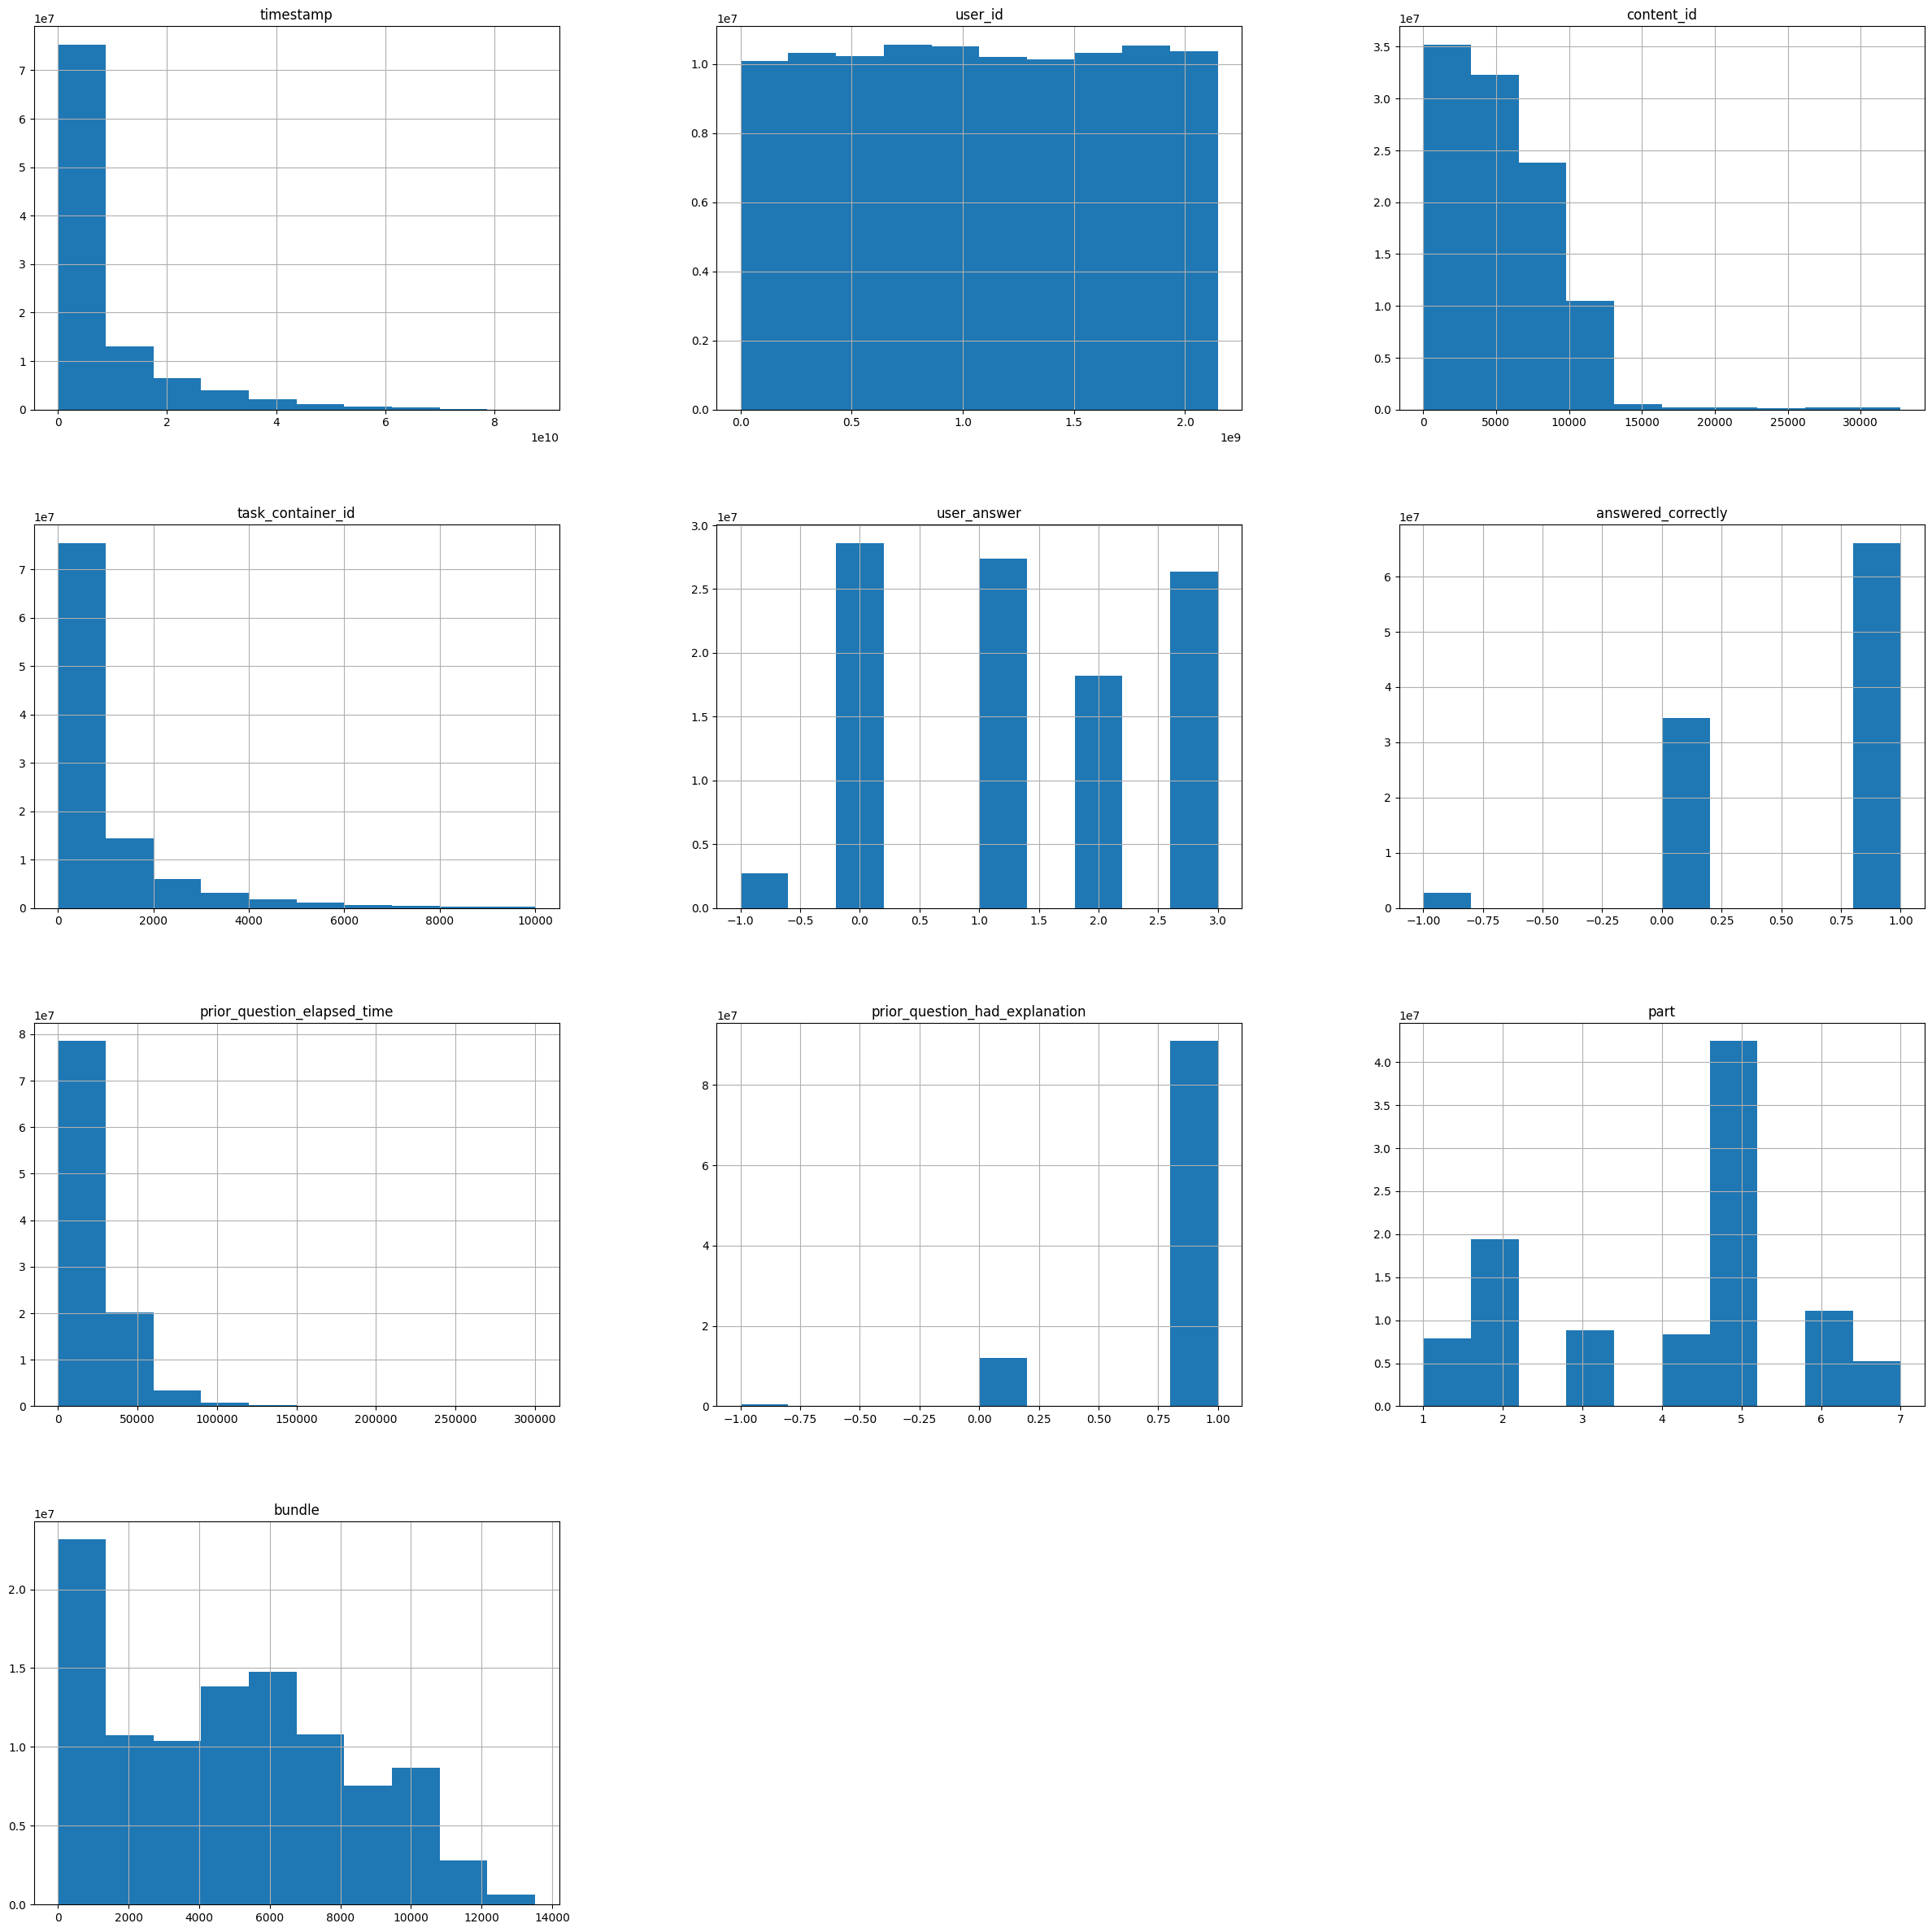

In [3]:
df_full.hist(figsize=(30,30))

На первый взгляд task_container_id, timestamp и prior_question_elapsed_time имеют схожие распределения. Стоит отметить, что в prior_question_elapsed_time я добавлял -1 для лекций, но в это же время они составляют чуть более 3% всех значений столбца.

## Анализ каждого отдельно взятого столбца.

In [6]:
import matplotlib.pyplot as plt

### user_id

In [45]:
df_full['user_id'].value_counts()

user_id
801103753     18250
1842816145    17155
1478712595    17146
1660941992    17119
455973631     17055
              ...  
2103184240        1
694377393         1
470439521         1
639106254         1
220576717         1
Name: count, Length: 393656, dtype: int64

<Axes: >

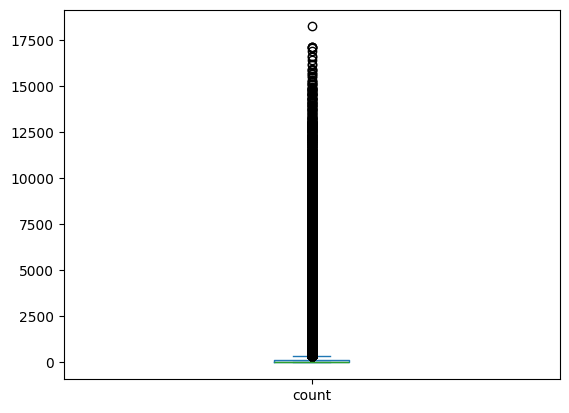

In [46]:
df_full['user_id'].value_counts().plot.box()

Много выбросов из за наличий id, которые большое количество раз представленны в датасете. Нет смысла что то делать с данным столбцом.  

### timestamp

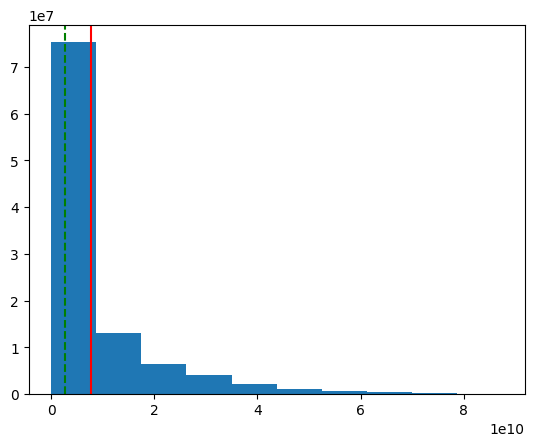

In [7]:
mean_Age = np.mean(df_full['timestamp'].values)
median_Age = np.quantile(df_full['timestamp'].values,q=0.5)
plt.hist(df_full['timestamp'])

plt.axvline(x=mean_Age, color='r', linestyle = '-', label='mean')
plt.axvline(x=median_Age, color='g', linestyle = '--', label='median')

plt.show()

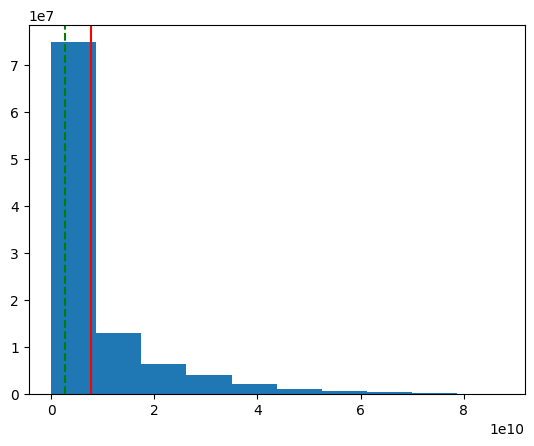

In [14]:
mean_Age = np.mean(df_full.loc[df_full['timestamp'] > 0, 'timestamp'].values)
median_Age = np.quantile(df_full.loc[df_full['timestamp'] > 0, 'timestamp'].values,q=0.5)
plt.hist(df_full.loc[df_full['timestamp'] > 0, 'timestamp'])

plt.axvline(x=mean_Age, color='r', linestyle = '-', label='mean')
plt.axvline(x=median_Age, color='g', linestyle = '--', label='median')

plt.show()

<Axes: ylabel='Frequency'>

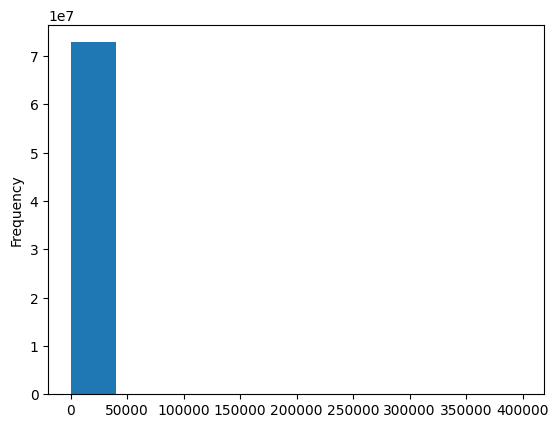

In [10]:
df_full['timestamp'].value_counts().plot.hist()

<Axes: >

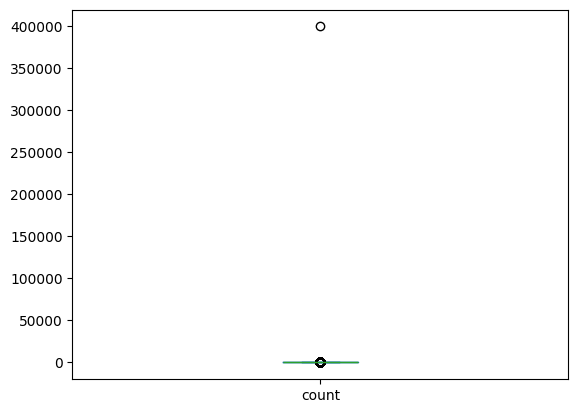

In [34]:
df_full['timestamp'].value_counts().plot.box()

In [12]:
df_full['timestamp'].value_counts()

timestamp
0              399097
24163              48
24220              48
23587              47
24702              47
                ...  
1173911491          1
854554458           1
16888928071         1
189775692           1
6236857793          1
Name: count, Length: 72821014, dtype: int64

In [13]:
df_full['timestamp'].value_counts()[1:].sum()

102902178

В силу измерения в милисекундах существует большое количество различных значений. Гистограмма распределения напоминает гиперболу.
Количество нулей больше, чем любого другого значения, но само количество нулей состовляет примерно 0.004% от всего столбца, что некритично.

### content_id

<Axes: xlabel='content_id'>

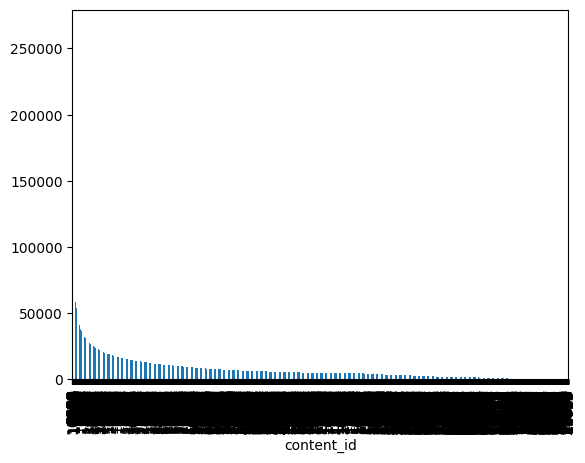

In [15]:
df_full['content_id'].value_counts().plot.bar()

<Axes: >

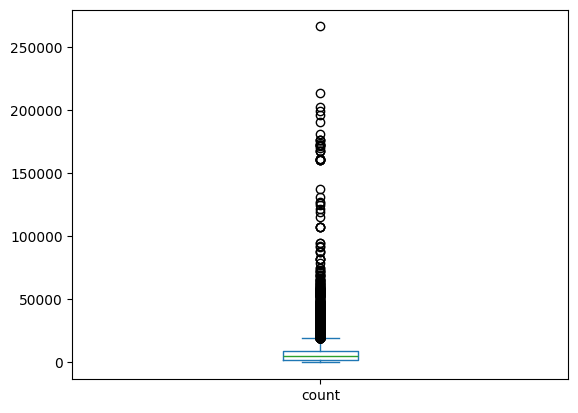

In [28]:
df_full['content_id'].value_counts().plot.box()

In [31]:
df_full['content_id'].value_counts()

content_id
10688    266092
6116     213605
6173     202106
4120     199372
175      195861
          ...  
5823          1
10008         1
10007         1
10006         1
10005         1
Name: count, Length: 13781, dtype: int64

Много выбросов. Преобладает content_id 266092.

### task_container_id

<Axes: xlabel='task_container_id'>

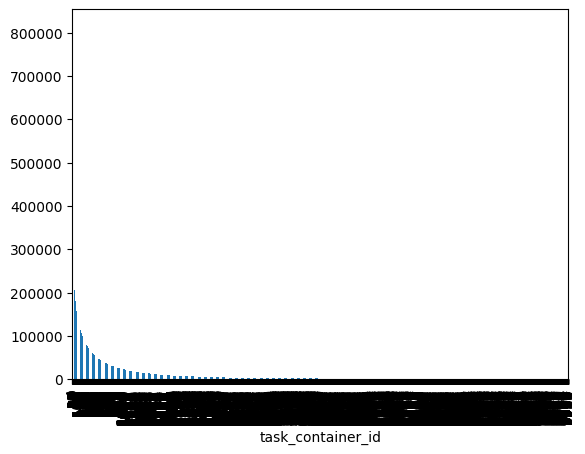

In [29]:
df_full['task_container_id'].value_counts().plot.bar()

<Axes: >

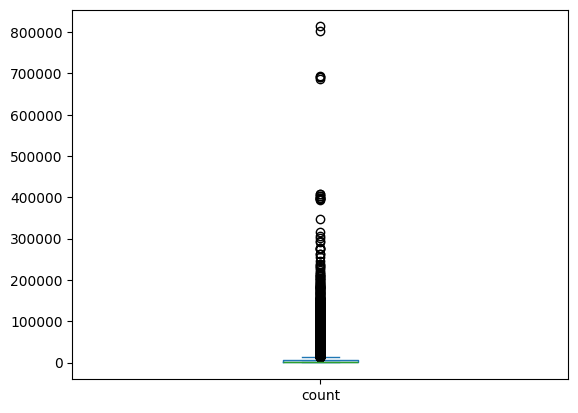

In [30]:
df_full['task_container_id'].value_counts().plot.box()

In [32]:
df_full['task_container_id'].value_counts()

task_container_id
14      813557
15      803261
4       693947
5       692222
6       691119
         ...  
9932       176
9966       176
9925       175
9937       175
9926       171
Name: count, Length: 10000, dtype: int64

Много выбросов. Преобладает task_container_id 813557.

### tags

<Axes: xlabel='tags'>

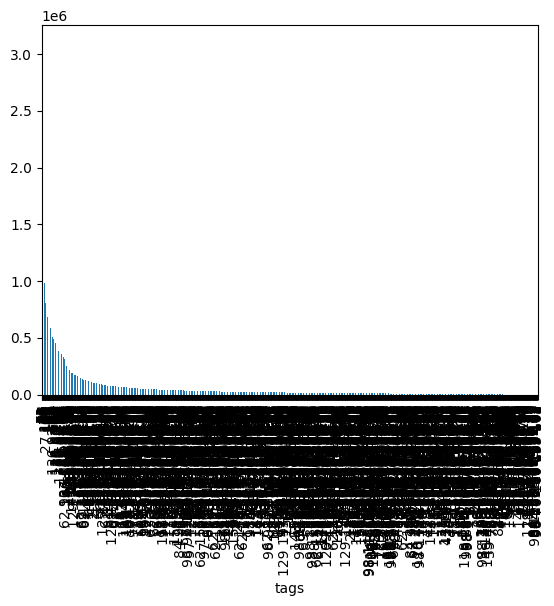

In [44]:
df_full['tags'].value_counts().plot.bar()

In [16]:
df_full['tags'].value_counts()

tags
73                   3099755
53                   2675850
1                    2304188
96                   2034887
27                   1915069
                      ...   
98 84 76 135              49
84 97 16 135 162          39
84 76 16 135 162          39
84 145 16 135 162         39
98 76 160 135 162         31
Name: count, Length: 1670, dtype: int64

Далее применяю Label encoding, потому что большое количество различных данных. Можно было разбить на группы поменьше, но не уверен насколько это положительно скажется на корреляции признаков.

In [18]:
from sklearn.preprocessing import LabelEncoder

label_encoding = LabelEncoder()
df_full["tags"] = label_encoding.fit_transform(df_full["tags"])

### user_answer

<Axes: xlabel='user_answer'>

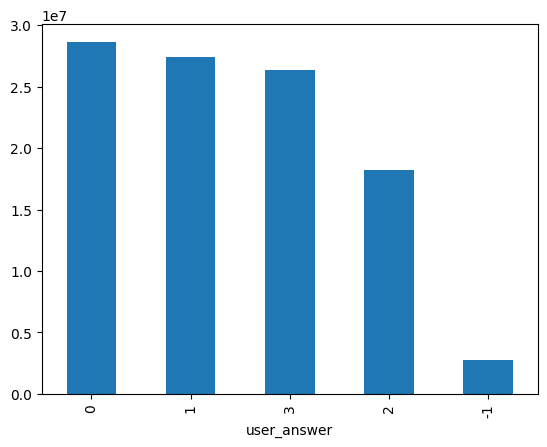

In [19]:
df_full['user_answer'].value_counts().plot.bar()

Количество -1 (лекции) в столбце намного меньше остальных значений. При этом значения 0,1,2,3 распределены практически равномерно.

### answered_correctly

<Axes: xlabel='answered_correctly'>

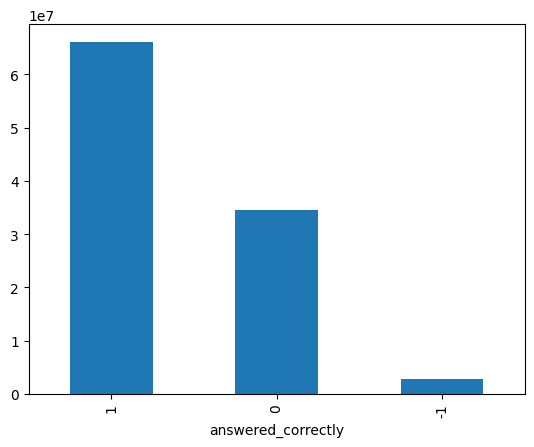

In [20]:
df_full['answered_correctly'].value_counts().plot.bar()

Разброс между правильным и неправильным ответом не сильно большой.

### prior_question_elapsed_time

<Axes: ylabel='Frequency'>

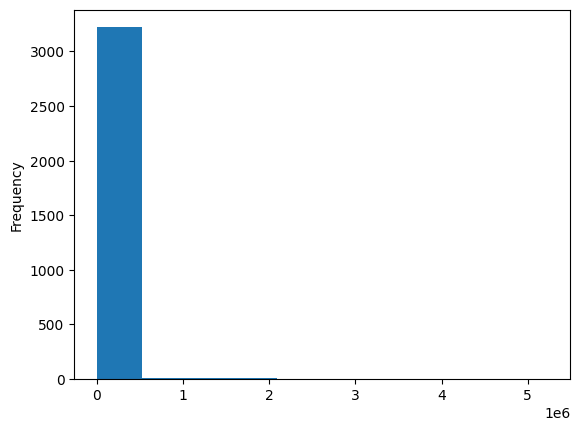

In [40]:
df_full['prior_question_elapsed_time'].value_counts().plot.hist()

<Axes: >

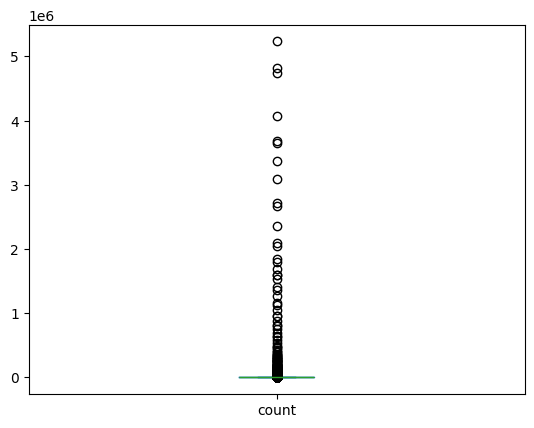

In [24]:
df_full.loc[df_full['prior_question_elapsed_time'] != -1, 'prior_question_elapsed_time'].value_counts().plot.box()

Большое количество выбросов. Думаю при необходимости для модели обучения можно разделить столбец на группы: -1: лекции, а остальное по квартилям как "очень хорошее", "хорошее", "плохое", "очень плохое" время.
И дальше поделить в one_hot_encoding, т.к. всего 5 групп.

### prior_question_had_explanation

<Axes: xlabel='prior_question_had_explanation'>

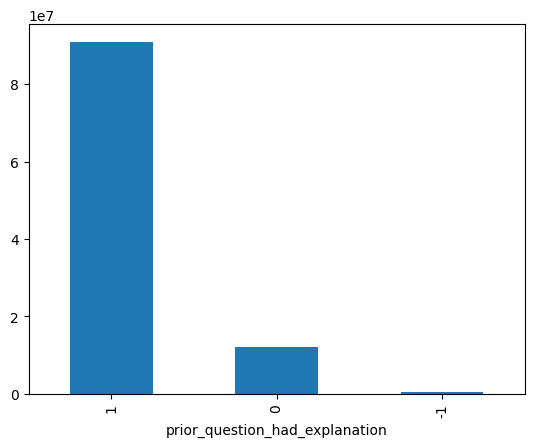

In [21]:
df_full['prior_question_had_explanation'].value_counts().plot.bar()

Большой разброс между наличием пояснения и его отсутствием.

### part

<Axes: xlabel='part'>

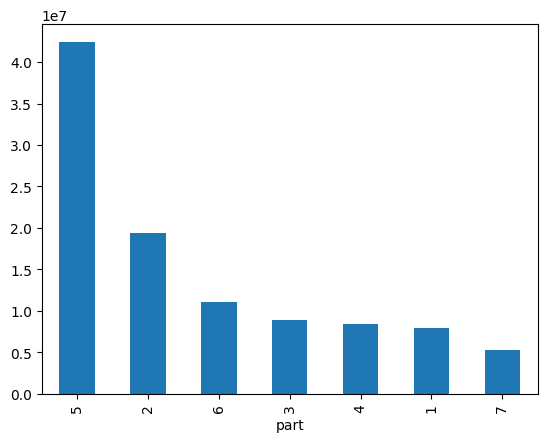

In [22]:
df_full['part'].value_counts().plot.bar()

### bundle

<Axes: xlabel='bundle'>

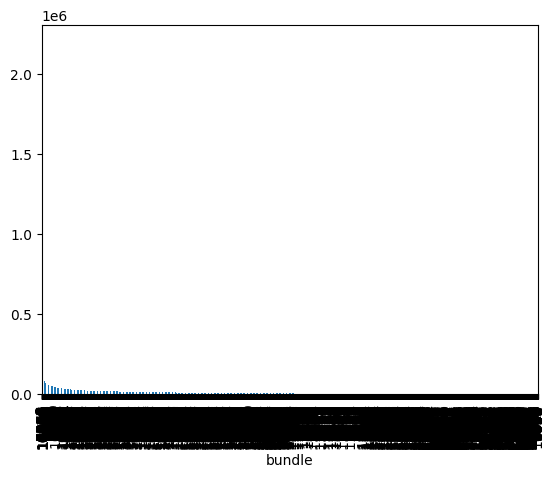

In [23]:
df_full['bundle'].value_counts().plot.bar()

In [24]:
df_full['bundle'].value_counts()

bundle
-1        2195409
-2         917263
 7216      641198
 2063      528129
 3363      517722
           ...   
 3572           5
 10005          4
 3557           3
 1484           3
 5823           1
Name: count, Length: 9768, dtype: int64

Преобладают разновидности лекций.

### content_type_id

In [33]:
df_full = df_full.astype({'content_type_id': 'int8'})

<Axes: xlabel='content_type_id'>

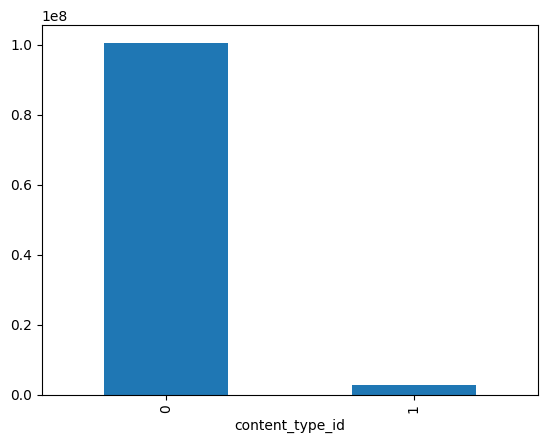

In [34]:
df_full['content_type_id'].value_counts().plot.bar()

Лекций намного меньше вопросов.

Еще очень наглядной могла быть sns.pairplot, но не хватает памяти и это заняло бы много времени в pandas(около 3900 секунд отрисовывался представленный ниже результат).

MemoryError: Unable to allocate 788. MiB for an array with shape (103301275,) and data type int64

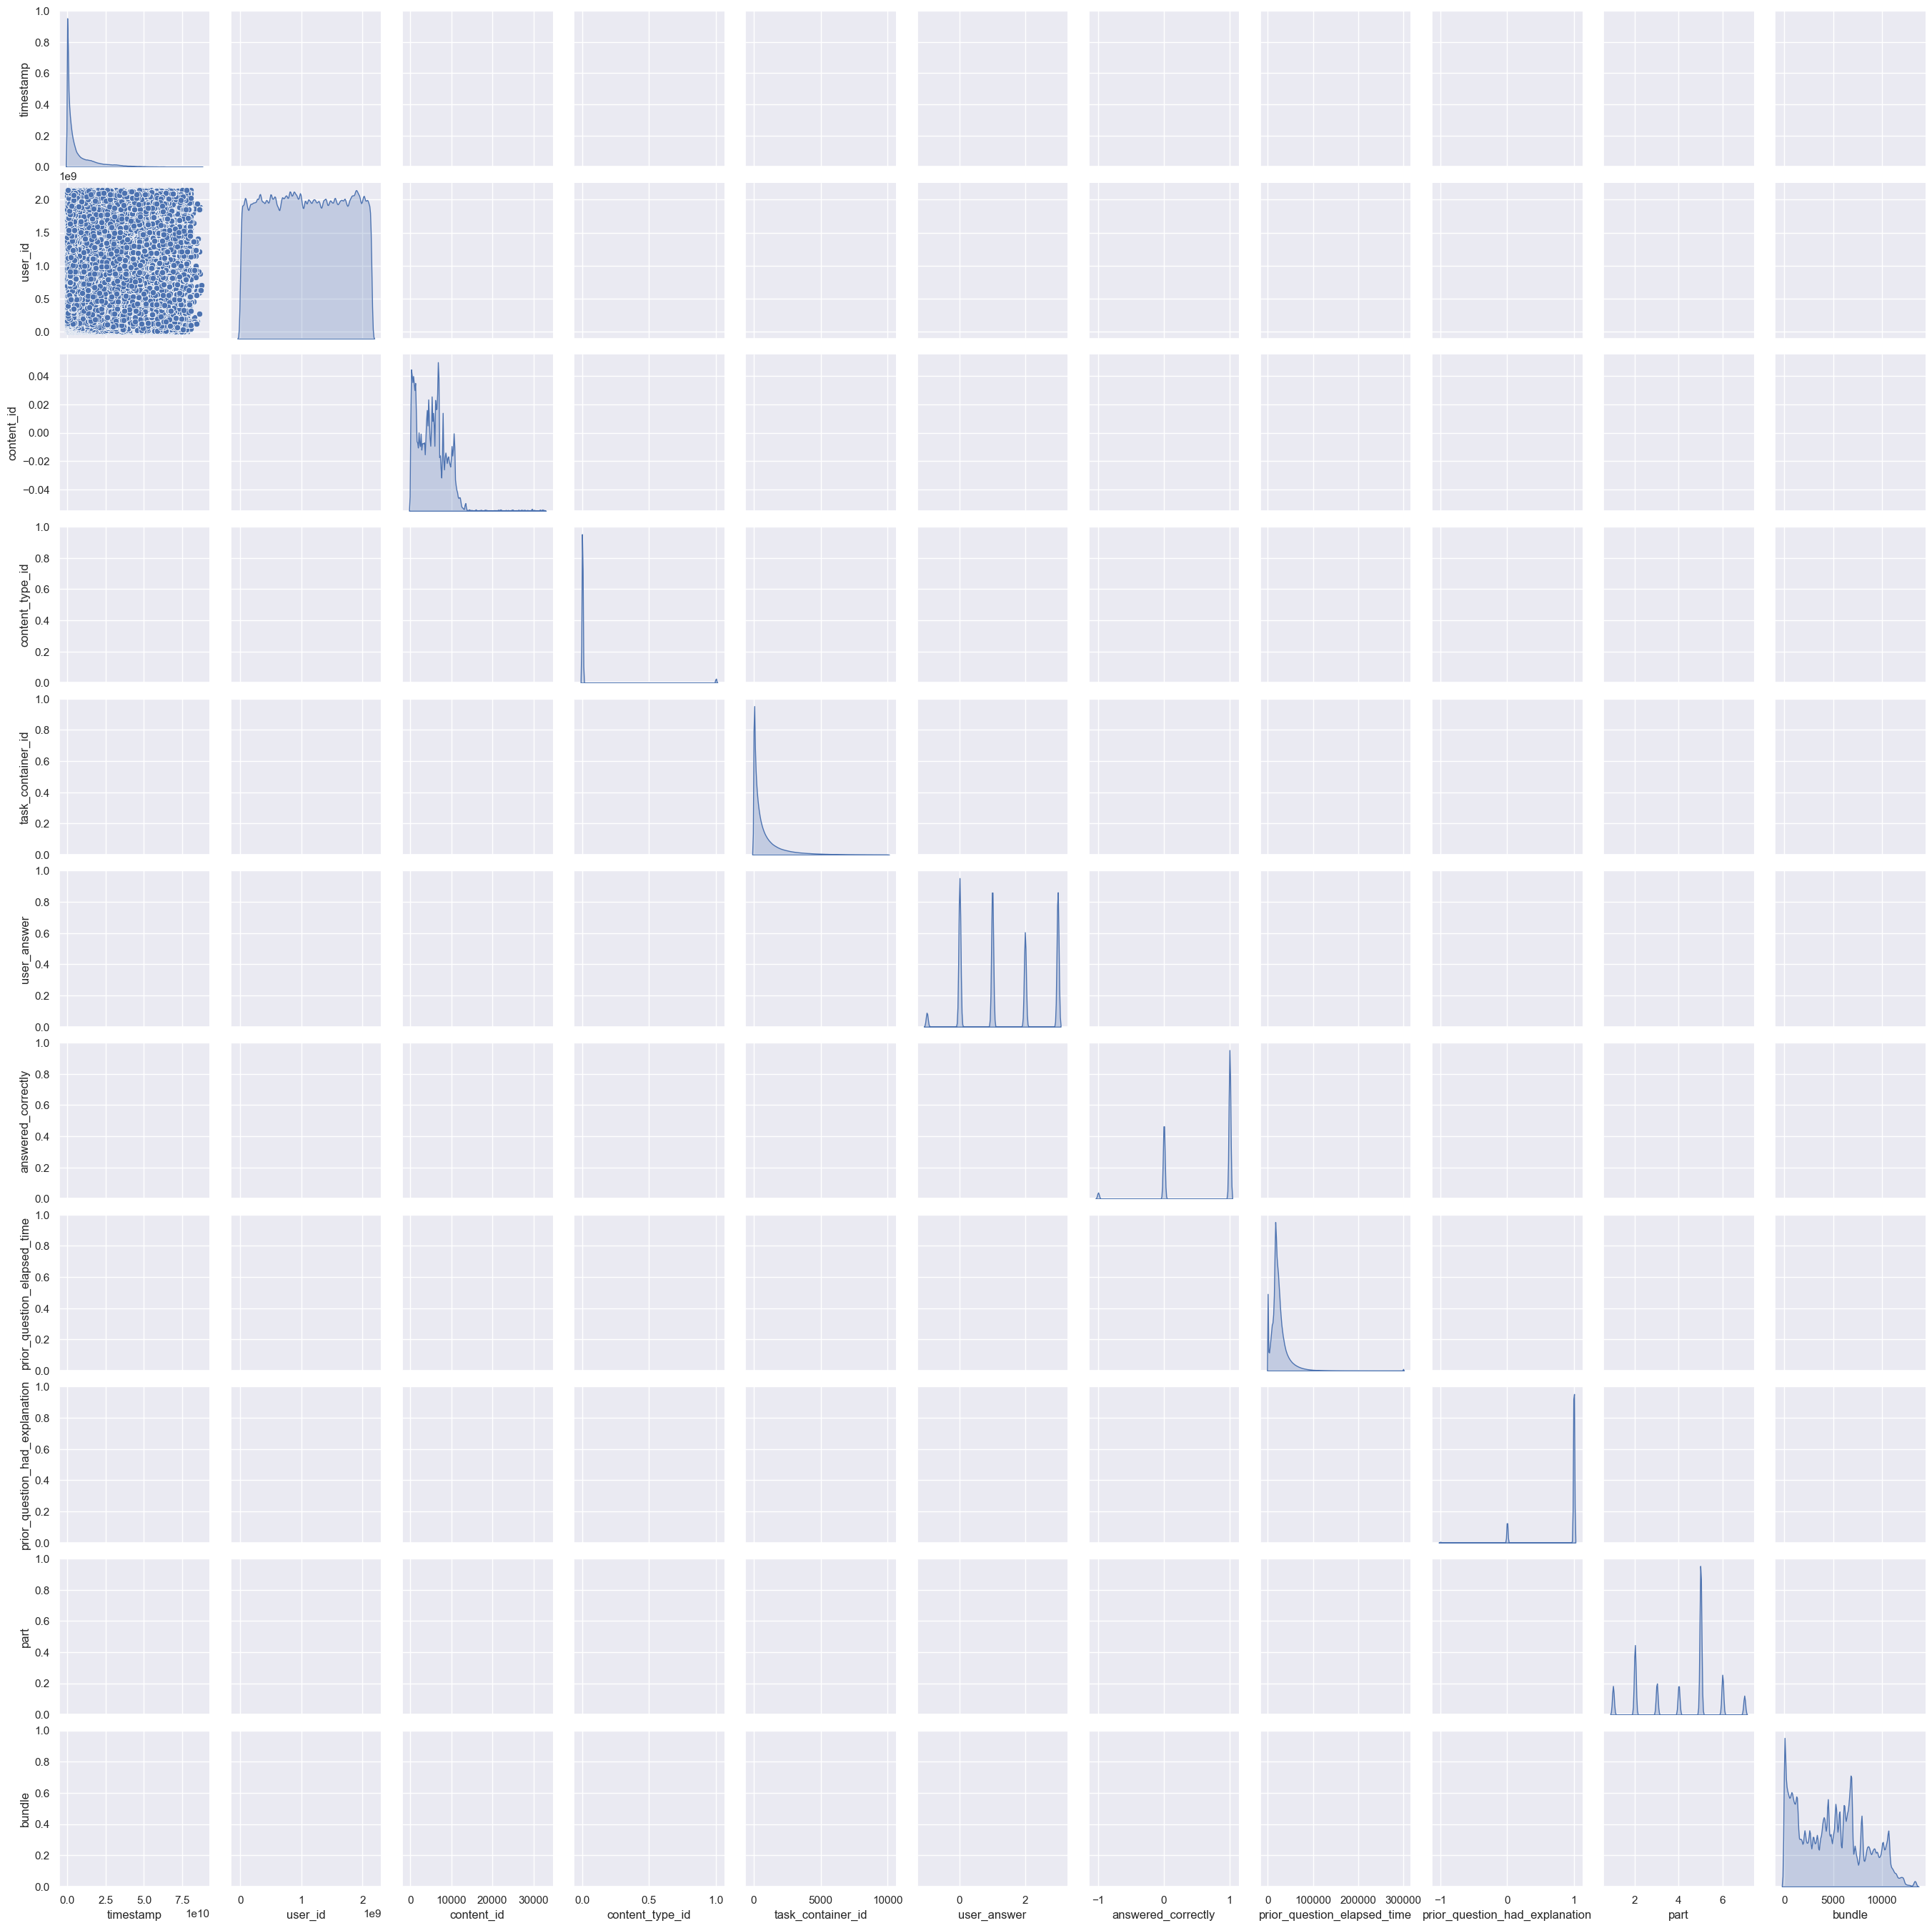

In [11]:
sns.set()
sns.pairplot(df_full ,kind ='scatter',diag_kind='kde')
plt.show()

## Матрица корреляций.

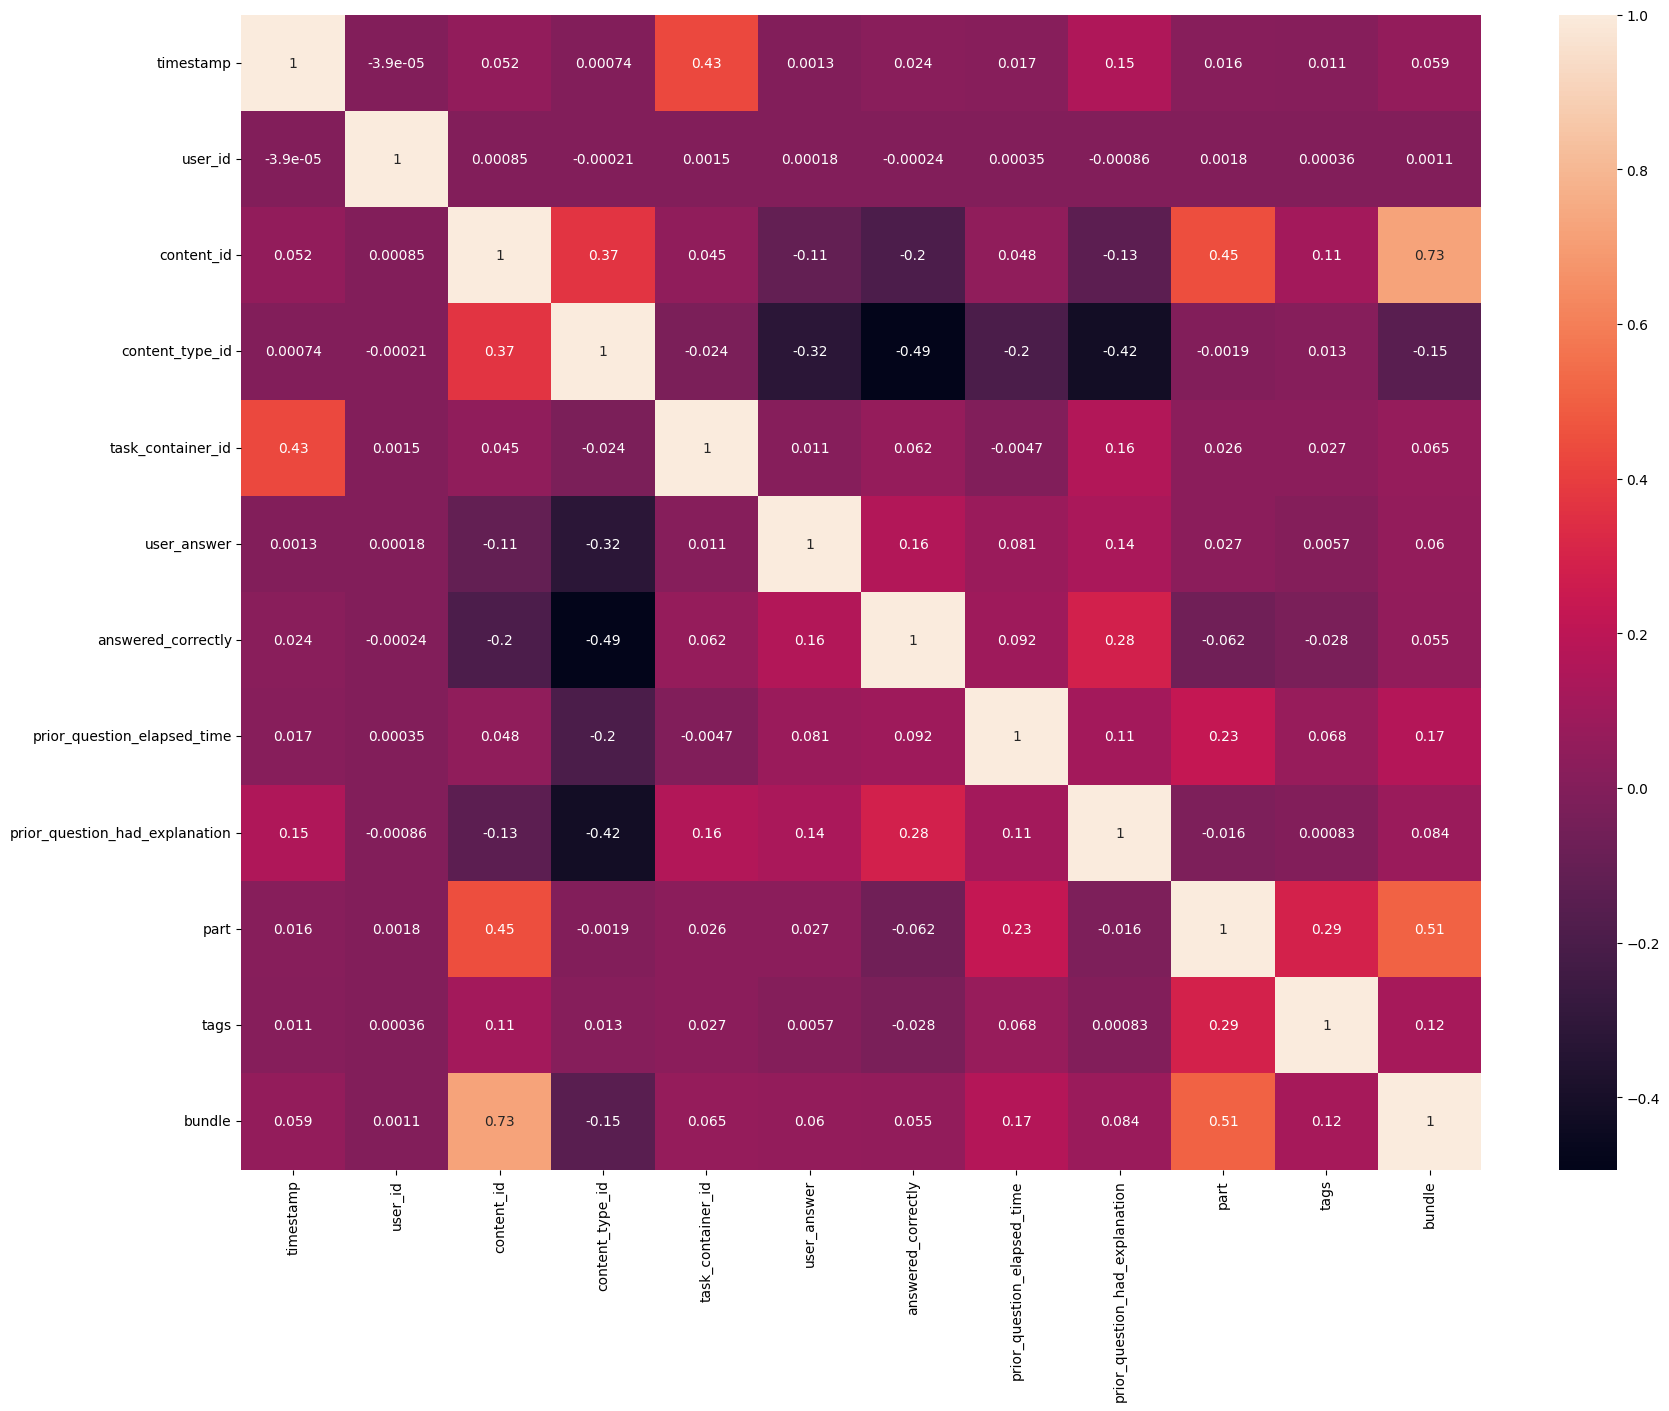

In [35]:
corrmap = df_full.corr()
fig, axes = plt.subplots(1, 1, figsize=(20, 15))
sns.heatmap(corrmap, annot=True, ax=axes)
plt.show()

Наблюдается большая корреляция между признаками. 
Есть смысл проверить и другие столбцы на мультиколлинеарность.
Присутствует корреляция целевой переменной с task_container_id и с prior_had_explanation. 